Hu, Y., Xie, Q., Jain, V., Francis, J., Patrikar, J., Keetha, N., ... & Bisk, Y. (2023). **Toward general-purpose robots via foundation models: A survey and meta-analysis**. arXiv preprint arXiv:2312.08782. | 7

# Overview

# Preliminaries

# Challenges in Robotics

# Review of Current Research Methodologies

In this section, we summarize the current research methodologies of foundation models for Robotics. In Section 4.1, we mainly discuss how foundation models are used in robotics in two categories: Foundation Models used in Robotics and Robotics Foundation Models (RFMs). For Foundation Models used in Robotics, we mainly highlight applications of vision and language foundation models used in a zero-shot manner, meaning no additional fine-tuning or training is conducted. In Section 4.2, however, we mainly focus on Robotics Foundation Models, wherein these approaches may warm-start models with vision-language pre-trained initialization and/or directly train the models on robotics datasets. Figure 5 shows the detailed taxonomy of this section.
在本节中，我们总结了当前机器人学基础模型的研究方法。

在4.1节中，我们主要讨论两类基础模型如何在机器人技术中使用：机器人技术中使用的基础模型和机器人基础模型（RFM）。

对于机器人技术中使用的基础模型，我们主要强调以零样本方式使用视觉和语言基础模型的应用，这意味着不进行额外的微调或训练。

然而，在第 4.2 节中，我们主要关注机器人基础模型，其中这些方法可以通过视觉语言预训练初始化来热启动模型和/或直接在机器人数据集上训练模型。

图 5 显示了本节的详细分类。
 
As introduced in the Section 2 (Preliminaries), a typical robotic system consists of perception, planning, and control modules. In this section, we review the methods presented in these papers following this classification method. Here, we combine motion planning and control into one piece—action generation and treat motion planning modules as higher-level and control as lower-level action generation. It is important to notice that although most of the works use foundation models in different functionality modules of the robotic systems, we will classify these papers into categories based on the module to which the paper contributes the most. There are, however, certain applications of the vision and language foundation models that go across these robotics modules, e.g., grounding of these models in robotics, and generating data from LLMs and VLMs. Given the autoregressive nature of current LLMs, they often grapple with extended horizon tasks. Thus, we also delve into advanced prompting methods proposed in the literature to ameliorate this limitation and enhance planning power. We list these applications in sections 4.1.4, 4.1.5 and 4.1.6, as a different perspective to analyze these works.

We find that works in Section 4.1 typically follow a modular strategy, in applying vision and language foundation models to serve a single robot functionality, e.g., applying VLMs as open-set robot perception modules which are then "plugged in" to work alongside motion planners and controllers [25], downstream. Since such foundation models are applied in a zero-shot manner, there are no gradients flowing between the module in which the foundation models are applied and the other modules in the robotic system. Conversely, works in Section 4.2 mostly follow an end-to-end differentiability paradigm, which blurs the boundary of the typical robotics modules in methods (described in Section 4.1; e.g., perception and control [27, 195]), with some robotics foundation models even providing a unified model to perform different robot functions [30, 31].


## Foundation Models used in Robotics
In this section, we focus on zero-shot application of vision and language foundation models in robotics. This mainly includes zero-shot deployment of VLMs used in robotic perception, in context learning of LLMs for task-level and motion-level planning, as well as action-generation. We show a few representative works in Figure 6.

### VFMs and VLMs in Robot Perception
Recently, the grounding of vision and language foundation models with geometric and object-centric representations of the world has enabled tremendous progress in context understanding, which is a vital requirement for robots to interact with the real world. We will thoroughly examine the application of VFMs and VLMs in robotic perception from various perspectives.


VFMs, VLMs for Object and Scene Representations The most straightforward application of VLMs in robotics is to leverage their ability to perform open-set object recognition and scene understanding in robotics-oriented downstream tasks, including semantic mapping and navigation [25, 201–204], manipulation [196–198, 205], etc. The methods proposed by these works share a common attribute: they attempt to extract semantic information (from the VLM) and spatial information (from other modules or sensor modalities) from objects and scenes that the robots interact with. This information is then used as representations in semantic maps of scenes or representations of objects.

For semantic mapping and/or navigation, NLMap [25] is an open-set and queryable scene representation to ground task plans from LLMs in surrounding scenes. The robot first explores the environment using frontier-based exploration to simultaneously build a map and extract class-agnostic regions of interest, which are then encoded by VLMs and aggregated to the map. Natural language instructions are then parsed by an LLM to search for the availability and locations of these objects in the scene representation map. ConceptFusion [203] builds open-set multimodal 3D maps from RGB-D inputs and features from foundation models, allowing queries from different modalities such as image, audio, text, and clicking interactions. It is shown that ConceptFusion can be applied for real-world robotics tasks, such as tabletop manipulation of novel objects and semantic navigation of autonomous vehicles. Similarly, CLIP-Fields [202] encodes RGB-D images of the scene to language-queryable latent representations as elements in a memory structure, that the robot policy can flexibly retrieve. VLMap [201] uses LSeg [151] to extract per-pixel representations to then fuse with depth information, in order to create a 3D map. This semantic 3D map is then down-projected to get a 2D map with the per-pixel embedding; these embeddings can then be matched with the language embedding from LSeg to obtain the per-pixel semantic mask for the 2D map. As for applying VLMs in topological graphs for visual navigation, LM-Nav [204] is a good example: it uses an LLM to extract landmarks used in navigation from natural language instructions. These landmark descriptions, as well as image observations, are then grounded in a pre-built graph via a VLM. Then, a planning module is used to navigate the robot to the specified landmarks.

Most of the previous works discussed above utilize only 2D representation of the objects and environment. To enrich the representation of foundation models in 3D space, F3RM [197] and GNFactor [198] distill 2D foundation model features into 3D space, by combining with NeRF and generalizable NeRF. In addition, GNFactor [198] also apply these distilled features in policy learning. Act3D [206] takes a similar approach but build 3D feature field via sensed depth.

VLMs for State Estimation and Localization Beyond context understanding, a few approaches explore the use of open-vocabulary properties of VLMs for state estimation [199, 199, 207–209]. Two such approaches, LEXIS [207] and FM-Loc [199], explore the use of CLIP [53] features to performindoor localization and mapping. In particular, FM-Loc [199] leverages the vision-language grounding offered by CLIP and GPT-3 to detect objects and room labels of a query image, then uses that semantic information to match it with reference images. Similarly, LEXIS [207] builds a real-time topological SLAM graph where CLIP features are associated with graph nodes, enabling room-level scene recognition. Although these approaches display the potential of vision-language features for indoor place recognition, they do not explore the broad applicability of foundation model features. In this context, AnyLoc [208] explored the properties of dense foundation model features and combined them with unsupervised feature-aggregation techniques to achieve state-of-the-art place recognition, by large margin—anywhere, anytime, and under any view—showcasing broad applicability of self-supervised foundation model features for SLAM.

VLMs for Interactive Perception Several works consider the notion of enabling robots to leverage the process of interactive perception, for extrapolating implicit knowledge about object properties in order to obtain performance improvements on downstream interactive robot learning tasks [166, 167, 200, 210–215]. This process of interactive perception is often modeled after the way in which human infants first learn about the physical world—i.e., through interaction, and by learning representations of object concepts, such as weight and hardness, from the sensory information (haptic, auditory, visual) that is generated from those physical exploratory actions (e.g., grasping, lifting, dropping, pushing) on objects with diverse properties. In particular, MOSAIC [200] leverages LMMs to expedite the acquisition of unified multi-sensory object property representations; the authors show competitive performances of their framework in category recognition and ambiguous target-object fetch tasks, despite the presence of distractor objects, under zero-shot transfer conditions.

# Review of Current Experiments and Evaluations
<!-- In this section, we summarize the datasets, benchmarks, and experiments of the current research works. -->
在本节中, 我们总结了当前研究工作的数据集、基准和实验。

## Datasets and Benchmarks
<!-- Relying solely on knowledge learned from language and vision datasets is limiting. Some concepts, like friction or weight, are not easily learned through these modalities alone, as suggested by Gao et al. [280] and Tatiya et al. [200] in their works on physically grounded VLMs. Therefore, in order to make robotic agents that can better understand the world, researchers are not just adapting foundational models from the language and vision domains; they are also advancing the development of large, diverse, and multimodal robotic datasets for training or fine-tuning these foundation models. This effort is now diverging into two directions: collecting data from the real world, versus collecting data from simulations and then transferring it to the real world. Each direction has its pros and cons. We will cover these datasets and simulations in the following paragraphs and discuss their respective advantages and disadvantages. -->
仅依靠从语言和视觉数据集中学到的知识是有限的。
正如高等人所建议的，一些概念，如摩擦力或重量，仅通过这些模态不容易被学到, 正如Gao et al. [280] and Tatiya et al. [200]关于物理落地 VLM 的研究中所提到的。
因此, 为了使机器人智能体能够更好地理解世界, 研究人员不仅要调整语言和视觉领域的基础模型; 
他们还在推进大型、多样化和多模式机器人数据集的开发, 用于训练或微调这些基础模型。
这个努力现在分为两个方向: 从现实世界收集数据, 以及从仿真收集数据, 然后将其传输到现实世界。
每个方向都有其优点和缺点。
我们将在下面的段落中介绍这些数据集和仿真, 并讨论它们各自的优点和缺点。

### RealWorld Robotics Datasets
<!-- Real-world robotics datasets are highly appealing due to their diverse object classes and multimodal inputs, offering a rich resource for training robotic systems without the need for complex and often inaccurate physical simulations. 
However, creating these large-scale datasets presents a significant challenge, primarily due to the absence of a substantial 'data flywheel' effect. 
This effect, which greatly benefited fields like CV and NLP through contributions from millions of internet users, is less evident in robotics. 
The limited incentive for individuals to upload extensive sensory inputs and corresponding action sequences poses a major hurdle in data acquisition. 
Despite these challenges, current efforts are focused on addressing these gaps. 
RoboNet [281] is a notable effort in this direction, offering a large-scale, diverse dataset across different robotic platforms for multi-robot learning. 
Bridge Dataset V1 [282] collects 7200 hours of demonstrations in real household kitchen manipulation tasks, and its following Bridge-V2 [283] contains 60,096 trajectories collected across 24 environments on common low-cost robots. 
Language-Table [253] collects 600,000 language-labeled trajectories—an order of magnitude larger than prior available datasets. 
RT-1 [27] contains 130k episodes that cover 700+ tasks, collected using a fleet of 13 Google mobile manipulation robots, over 17 months.
While the aforementioned datasets represent significant advancement over prior lab-scale datasets, offering a relatively large volume of data, they are limited to single modalities or specific robot tasks. -->
现实世界的机器人数据集非常有吸引力, 因为其多样化的对象类别和多模式输入, 为训练机器人系统提供了丰富的资源, 无需复杂且通常不准确的物理仿真。
然而, 创建这些大规模数据集提出了重大挑战，主要因为实质性的"数据飞轮"效应的缺乏。
这种效应(通过数百万互联网用户的贡献)使 CV 和 NLP 等领域受益匪浅, 但在机器人中却不明显。
个人上传大量感知输入和相应动作序列的有限激励, 造成数据采集的主要障碍。
尽管存在这些挑战, 当前的努力仍集中在解决这些差距。
<font color="red">RoboNet [281]</font>是这个方向上的一项值得注意的努力, 它为多机器人学习提供跨不同机器人平台的大规模、多样化的数据集。
<font color="red">Bridge 数据集 V1 [282]收集了真实家庭厨房操作任务中的7200小时演示</font>, 其后续的<font color="red">Bridge-V2 [283]</font>包含在常见低成本机器人上从 24 个环境收集的 60,096 个轨迹。
<font color="red">Language-Table [253]</font>收集了 600,000 个语言标记的轨迹——比之前可用的数据集大一个数量级。
<font color="red">RT-1</font> [27] 包含 13 万 episodes, 涵盖 700 多个任务, 使用 13 个 Google 移动操纵机器人在 17 个月内收集。
尽管上述数据集较之前的实验室规模数据集, 表现出显着进步, 提供了相对大量的数据, 但它们仅限于单一模态或特定的机器人任务。

<!-- To overcome these limitations, some recent initiatives have made notable progress. 
For example, GNM [267] successfully integrated six different large-scale navigation datasets, utilizing a unified navigation interface based on waypoints. 
Furthermore, a recent collaborative effort among various laboratories called RT-X [176] has aimed to standardize data across different datasets, by using a 7-degree-of-freedom end-effector's pose as a universal reference across different embodiments. 
This approach facilitates the joint use of diverse datasets and showed positive performance in cross-morphology transfer learning. -->
为了克服这些限制, 最近的一些举措取得了显着进展。
例如, <font color="red">GNM [267]</font>利用基于途径点的统一导航接口, 成功集成了六个不同的大规模导航数据集。
此外, 最近各实验室之间的一项名为<font color="red">RT-X [176]</font>的合作, 旨在通过使用 7 自由度末端执行器的位姿作为不同具身的通用参考, 标准化不同数据集的数据。
这种方法促进了不同数据集的联合使用, 并在跨形态迁移学习中表现出积极的性能。

<!-- Building on these advancements, the scale of real-world robotics datasets is beginning to grow, albeit still lagging behind the immense volume of internet-scale language and vision corpora. 
The accessibility of advanced hardware such as the Hello Stretch Robot, Unitree Quadrupeds, and open-source dexterous manipulators [284] is expected to catalyze this growth. 
As these technologies become more widely available, they are likely to initiate the desired 'data flywheel' effect in Robotics. -->
在这些进步的基础上, 现实世界的机器人数据集的规模开始增长, 但仍然落后于庞大的互联网规模的语言和视觉语料库。
先进硬件(如 Hello Stretch Robot、Unitree Quadrupeds 和开源灵巧机械手 [284])的普及预计将促进这一增长。
随着这些技术变得越来越广泛可用，它们可能会在机器人中引发所需的"数据飞轮"效应。

### Robotics Simulators
<!-- While we await the widespread deployment of robotic hardware to gather massive amounts of robot data, another approach is to develop simulators that closely mimic real-world graphics and physics. 
The advantage of using simulation is the ability to deploy tens of thousands of robot instances in a simulated world, enabling simultaneous data collection. -->
当我们等待机器人硬件的广泛部署来收集大量机器人数据时, 另一种方法是开发紧密模仿现实世界图形和物理的模拟器。
使用模拟的优点是能够在模拟世界中部署数以万计的机器人实例, 从而实现同步数据收集。

<!-- Simulators focus on different aspects, such as photorealism, physical realism, and human-in-the-loop interactions. 
For navigation tasks, photorealistic simulators are crucial. 
AI Habitat addresses this by utilizing realistically-scanned 3D scenes from the Matterport3D [285] and Gibson [286] datasets.
Furthermore, Habitat [287] is a simulator that allows AI agents to navigate through various realistic 3D spaces and perform tasks, including object manipulation. 
It features multiple sensors and handles generic 3D datasets. 
Habitat 2.0 [174] builds upon the original by introducing dynamic scene modeling, rigidbody physics, and increased speed. 
Habitat 3.0 [175] further integrates programmable humanoids to enhance the simulation experience. 
Additionally, the AI2THOR simulator [288] is another promising framework for photorealistic visual foundation model research, as evidenced in [201, 289]. 
Other simulators, like Mujoco [170], focus on creating physically realistic environments for advanced manipulation and locomotion tasks. -->
模拟器专注于不同的方面, 例如视觉真实感、物理真实感和人机循环交互。
对于导航任务, 逼真的模拟器至关重要。
AI Habitat 通过利用 Matterport3D [285] 和 Gibson [286] 数据集中真实扫描的 3D 场景来解决这个问题。
此外, Habitat [287] 是一个模拟器, 允许 AI 智能体在各种现实的 3D 空间中导航, 并执行任务, 包括对象操作。它具有多个传感器, 并处理通用 3D 数据集。
Habitat 2.0 [174] 在原版的基础上引入了动态场景建模、刚体物理和更高的速度。
<font color="red">Habitat 3.0 [175]</font>进一步集成了可编程人形机器人, 以增强模拟体验。
此外, <font color="red">AI2THOR 模拟器 [288]</font>是另一个(用于逼真视觉基础模型研究的)有前途的框架, 如 [201, 289] 中所证明的。
其他模拟器, 如<font color="red">Mujoco [170]</font>, 专注于为高级操作和运动任务, 创建物理真实环境。

<!-- Moreover, simulators like AirSim [290] and the Arrival Autonomous Racing Simulator [102], both built on Unreal Engine, provide a balance of reasonable physics and photorealism. 
Ultimately, while the aforementioned simulators excel in various areas, they face common challenges such as parallelism. 
Simulators like Issac Gym [171] and Mujoco 3.0 [291] have attempted to overcome these challenges by using GPU acceleration to expedite the data-collection process. -->
此外, <font color="red">AirSim [290] 和 Arrival Autonomous Racing Simulator [102]</font>等模拟器都基于虚幻引擎构建，提供合理的物理与视觉真实感之间的平衡。
最终，虽然上述模拟器在各自领域表现出色, 但它们面临着并行性等共同挑战。
<font color="red">Issac Gym [171] 和 Mujoco 3.0 [291]</font>等模拟器尝试通过使用<font color="red">GPU 加速</font>克服这些挑战, 以加快数据收集过程。

<!-- Despite the abundance of data available in simulators, there are inherent challenges in their use. 
Firstly, the domain gap between simulations and the real world makes transferring from sim to real problematic—issues that early works are already seeking to resolve [164]. 
Secondly, the diversity of environments and base objects is still lacking. 
Therefore, to effectively utilize simulations in the future, continuous improvements in these two areas are essential. -->
尽管模拟器中有大量可用数据, 但在使用中仍存在固有的挑战。
首先, 模拟与现实世界之间的领域差距, 使得从模拟到现实的迁移成为问题——早期的工作已经在寻求解决这些问题[164]。
其次, 环境和基础对象的多样性仍不足。
因此, 为了在未来有效地利用模拟, 这两个领域的持续改进是至关重要的。

## Analysis of Current Method Evaluation

<!-- We conduct a meta-analysis of the experiments of papers listed in Tables 2 to 7 and Figure 11, encouraging readers to consider the following questions
1. What tasks are being solved?
2. On what datasets or simulators have they been trained? What robot platforms are used for testing?
3. What foundation models are being utilized? How effectively are the tasks solved?
4. What base foundation models are more frequently used in these methods?
We summarize several key trends observed in the current literature concerning the experiments conducted: -->
我们对表2-7和图11中列出的论文的实验进行了meta分析, 鼓励读者思考以下问题
1. 正在解决哪些任务？
2. 它们在哪些数据集或模拟器上进行训练？使用哪些机器人平台进行测试？
3. 正在使用哪些基础模型？任务求解的效率如何？
4. 在这些方法中哪些基础模型更常用？

针对进行的实验, 我们总结了当前文献中观察到的几个主要趋势:

<!-- Imbalanced Focus among Manipulation Tasks: There is a significant emphasis on general pick-place tasks, particularly tabletop and mobile manipulation. 
This is likely due to the ease of training for tabletop gripper-based manipulation skills and their potential to form skill libraries that interact with foundation models. 
However, there is a lack of extensive exploration in low-level action outputs, such as dexterous manipulation and locomotion. -->
**操作任务之间的不平衡关注点**: 非常重视一般的拾取放置任务, 特别是桌面和移动操作。
这可能是由于训练基于桌面夹具的操作技能相对容易, 以及它们形成(与基础模型交互的)技能库的潜力。
然而, 缺乏对低级动作输出的广泛探索, 例如灵巧的操作和运动。

<!-- Need for Improved Generalization and Robustness: Generalization and robustness of end-to-end foundational robotics models have room for improvement. 
In tabletop manipulation, the use of foundation models leads to performance drops ranging from 21% [27, 227] to 31% [28] in unseen tasks.
In addition, these models still need improved robust to disturbances, performance drops 14% [27] to 18% [227] for similar tasks. -->
**需要改进泛化性和鲁棒性**: 端到端基础机器人模型的泛化性和鲁棒性还有改进的空间。
在桌面操作中, 基础模型的使用会导致(在未见过的任务中)性能下降 21% [27, 227] 到 31% [28]。
此外, 这些模型仍需要提高对干扰的鲁棒性, 对于类似的任务, 性能下降 14% [27] 到 18% [227]。

<!-- Limited Exploration in Low-Level Actions: There remains a gap in the exploration of direct low-level action outputs. The majority of research focuses on task-level planning and utilizes foundation models with pre-trained or pre-programmed skill libraries. However, existing papers [28, 30, 176] that explore low-level action outputs mainly focus on table-top manipulation, where the action space is limited to the end effector's 7 degrees of freedom (DoF). Models that directly output joint angles for tasks like dexterous manipulation and locomotion still require a more thorough research cycle. -->
**低层行动的有限探索**: 在直接低层行动输出的探索中仍存在差距。
大多数研究侧重于任务级规划, 并利用(具有预训练或预先编程的技能库的)基础模型。
然而, 探索低层动作输出的现有论文[28,30,176]主要集中在桌面操作, 其中动作空间仅限于末端执行器的7个自由度(DoF)。
(为灵巧操作和运动等任务)直接输出关节角度的模型仍然需要更全面的研究周期。

<!-- Control Frequencies Too Slow to be Deployed on Real Robots: Most current approaches to robotic control are open-loop, and even those that are closed-loop face limitations in inference speed. These speeds typically range from 1 to 10 Hz, which is considered low for the majority of robotics tasks. Particularly for tasks like humanoid locomotion, a high-frequency control of around 500 Hz is required for the stabilization of the robot’s body [322]. -->
**控制频率太慢难以部署到真实的机器人上**: 当前大多数机器人控制方法都是开环的, 甚至闭环的方法面临推理速度的限制。
<font color="red">它们的速度通常在 1 到 10 Hz范围内, 对于大多数机器人任务而言, 这被认为较慢。
特别是对于人形机器人运动这样的任务, 需要大约 500 Hz 的高频控制, 以稳定机器人的身体[322]</font>。

<!-- Lack of Uniform Benchmarks for Testing: The diverse nature of simulations, embodiments, and tasks in robotics leads to varied benchmarks, complicating the comparison of results. 
Additionally, while success rate is often used as the primary metric, it may not sufficiently evaluate the performance of real-world tasks involving large foundation models, as latency is not captured by the success rate alone. 
More nuanced evaluation metrics that consider inference time, such as the Compute Aware Success Rate (CASR) [225]. -->
**缺乏统一的测试基准**: 机器人中模拟、具身和任务的多样性导致基准不同, 从而使结果的比较更加复杂。
此外, 尽管成功率通常被用作主要指标, 但它可能无法充分评估(涉及大型基础模型的)现实世界任务的性能, 因为 latency 并不能单独被成功率捕获。
考虑推理时间的更细致的评估指标, 例如计算感知成功率(CASR)[225]。

Table 2: Tabletop Manipulation
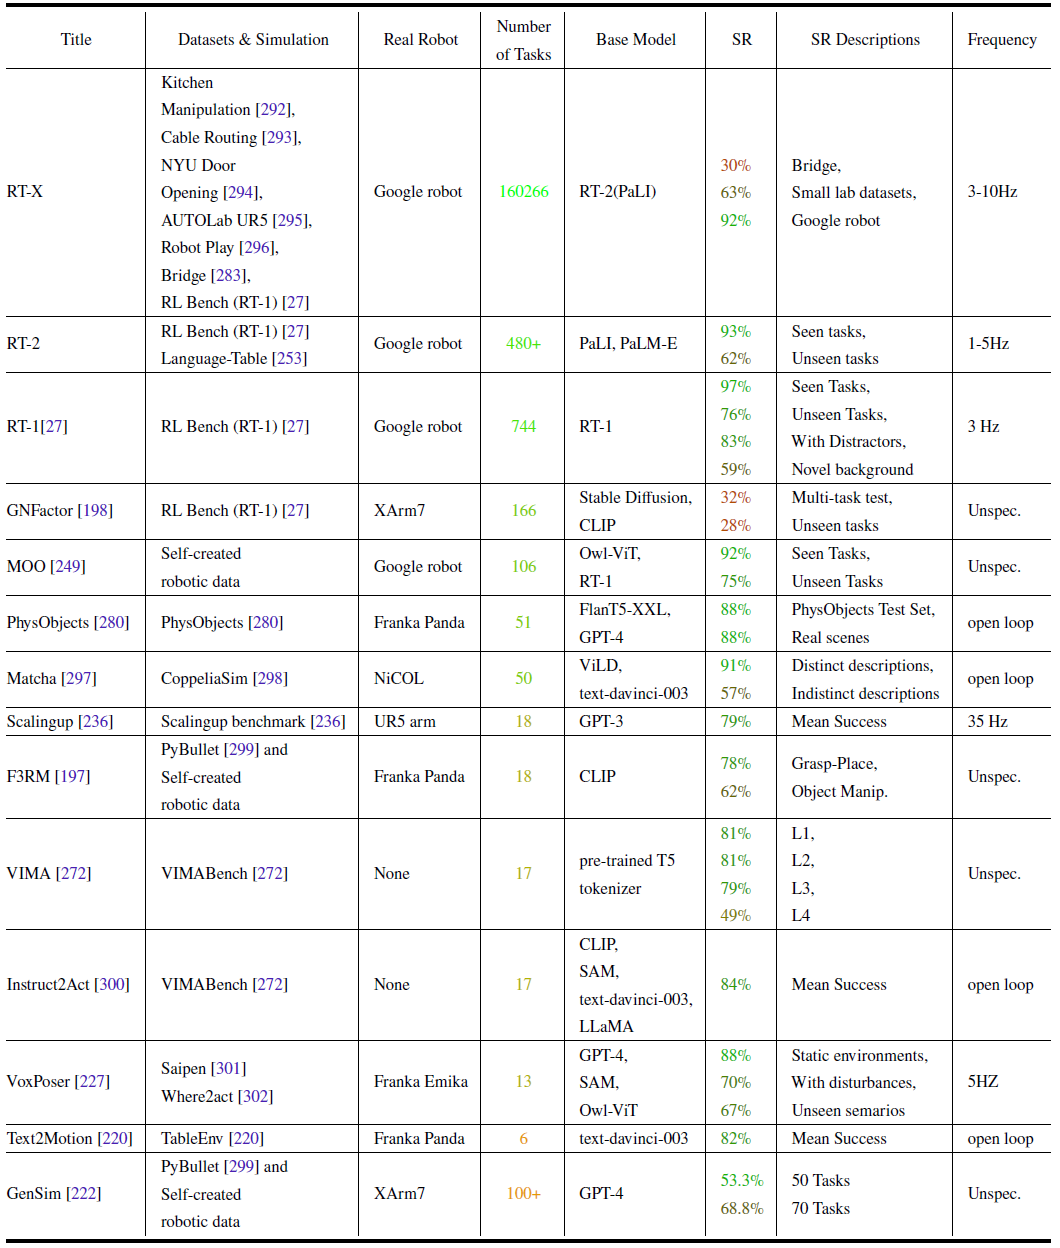

Table 3: Dexterous Manipulation
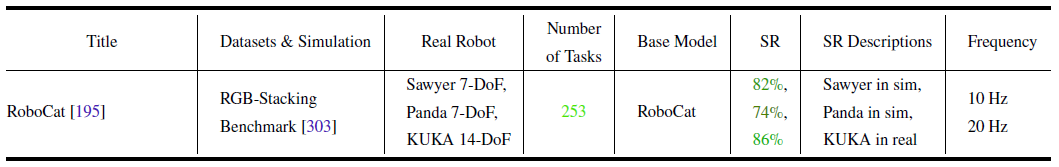

Table 4: Mobile Manipulation
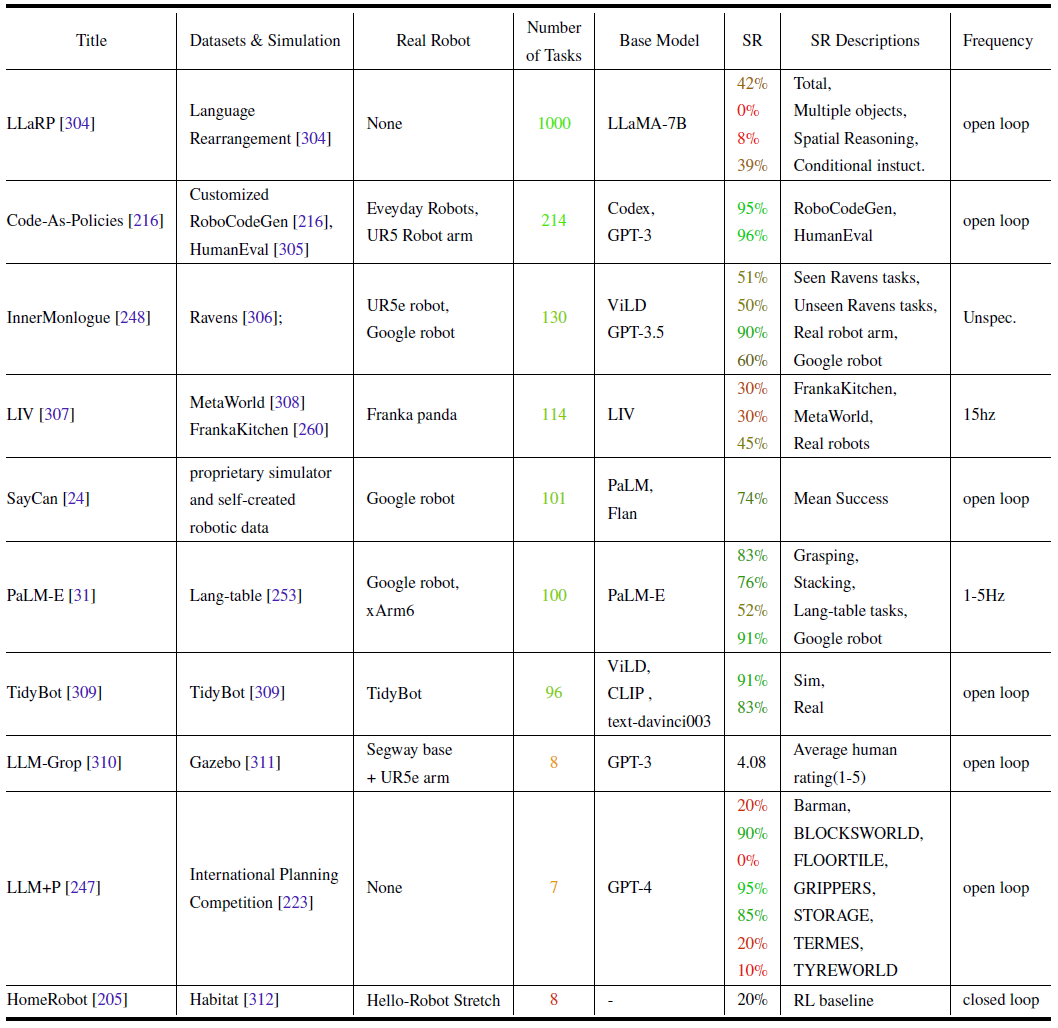

Table 5: Navigation
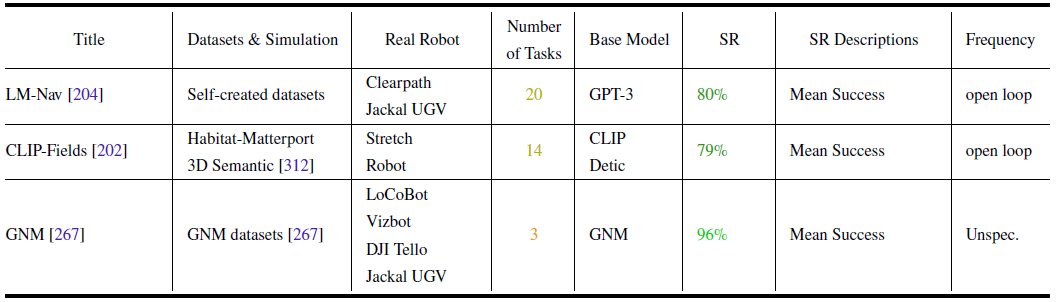

Table 6: locomotion
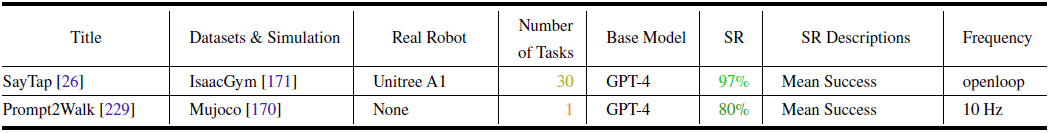

Table 7: Multi-Tasks
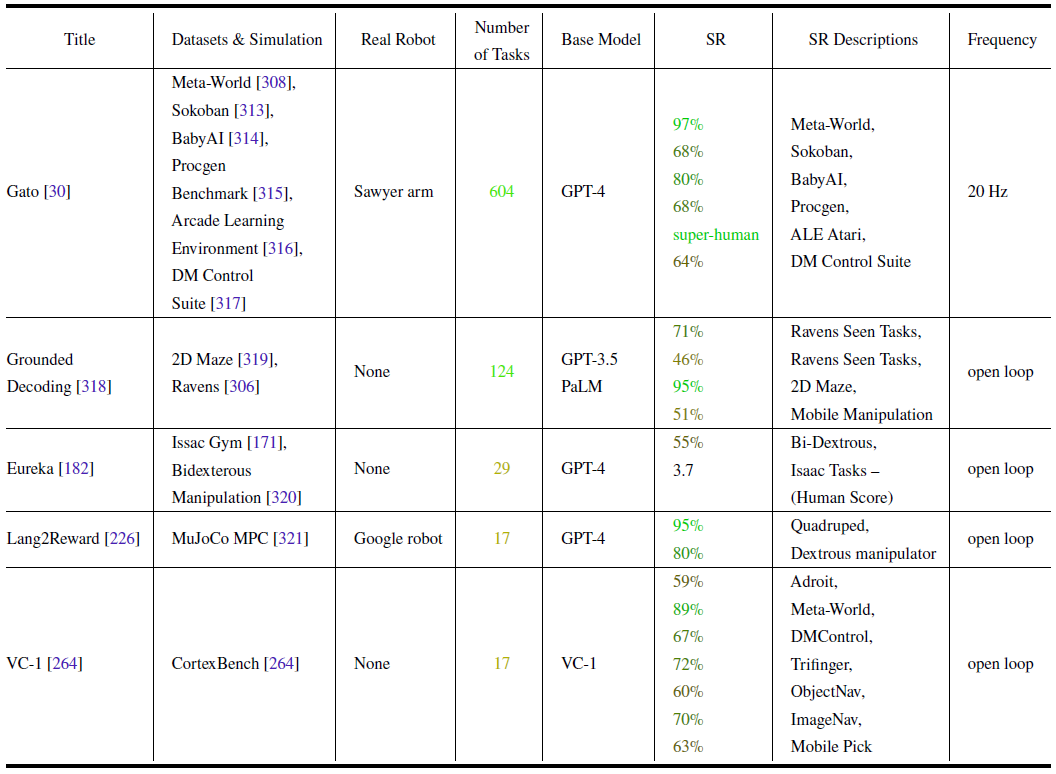